## Manual Input

In [1]:
# 투자금 변화 입력
list_capital = [
    ['2021-12-10', 1500000, 2000000, 0, 17100000, 0],
    ['2022-03-21', 1500000, 2000000, 750000, 17100000, 0],
    ['2022-04-21', 1500000, 2000000, 1000000, 17100000, 0], 
    ['2022-05-11', 1500000, 2000000, 1000000, 17100000, 51411787], 
    ['2022-05-14', 2000000, 2000000, 1000000, 17100000, 51411787]
]

# 주차별 자산평가액 입력
list_eva = [
    ['2021-12-10', 1500000, 2000000, 0, 17100000, 0],
    ['2022-04-01', 1320963, 1815919, 745075, 17169766, 0],
    ['2022-04-08', 1328128, 1824105, 739964, 17110423, 0],
    ['2022-04-20', 1306232, 1843025, 734283, 17122584, 0],
    ['2022-04-26', 1300044, 1825530, 974443, 16710626, 0],
    ['2022-05-04', 1297685, 1810670, 973821, 16818596, 0],
    ['2022-05-11', 1280706, 1787935, 963967, 16557094, 51411787],
    ['2022-05-18', 1747918, 1792125, 963923, 16606513, 51411787]
]

# 종목 정보 - 신규 종목 매수 시, 별도 지정 필요
ticker = {
    '005930': ['삼성전자',  'KR',  'STOCK'],
    '000660': ['SK하이닉스',  'KR',  'STOCK'],
    '035420': ['NAVER',  'KR',  'STOCK'],
    '069500': ['KODEX 200',  'KR',  'ETF'],
    '088980': ['맥쿼리인프라',  'KR',  'STOCK'],
    '123310': ['TIGER 인버스',  'KR',  'ETF'],
    '133690': ['TIGER 미국나스닥100',  'KR',  'ETF'],
    '139280': ['TIGER 경기방어',  'KR',  'ETF'],
    '157490': ['TIGER 소프트웨어',  'KR',  'ETF'],
    '195980': ['ARIRANG 신흥국MSCI(합성 H)',  'KR',  'ETF'],
    '219390': ['KBSTAR 미국S&P원유생산기업(합성 H)',  'KR',  'ETF'],
    '266410': ['KODEX 필수소비재',  'KR',  'ETF'],
    '271050': ['KODEX WTI원유선물인버스(H)',  'KR',  'ETF'],
    '319640': ['TIGER 골드선물(H)',  'KR',  'ETF'],
    '334690': ['KBSTAR 팔라듐선물(H)',  'KR',  'ETF'],
    '332610': ['ARIRANG 미국단기우량회사채',  'KR',  'ETF'],
    '360750': ['TIGER 미국S&P500',  'KR',  'ETF'],
    '371450': ['TIGER 글로벌클라우드컴퓨팅INDXX',  'KR',  'ETF'],
    '371460': ['TIGER 차이나전기차SOLACTIVE',  'KR',  'ETF'],
    '373790': ['KOSEF 미국방어배당성장나스닥',  'KR',  'ETF'],
    '394350': ['KOSEF 릭소글로벌퓨처모빌리티MSCI',  'KR',  'ETF'],
    '409810': ['KODEX 미국나스닥100선물인버스(H)',  'KR',  'ETF'],
    '411420': ['KODEX 미국메타버스나스닥액티브',  'KR',  'ETF'],
    '510006': ['대신 인버스 니켈선물 ETN(H)',  'KR',  'ETF'],
    '530020': ['삼성 미국 대형 가치주 ETN',  'KR',  'ETF'],
    '570049': ['TRUE S&P500 양매도 4% OTM ETN(H)',  'KR',  'ETF'],
    '590018': ['미래에셋 중국 심천 100 ETN',  'KR',  'ETF'],
    '329200': ['TIGER 리츠부동산인프라', 'KR', 'ETF']
}

# 일자, Ticker, 주식수, 체결가격, Bank account
# Price: 매수+, 매도-
actions = [
    ['2021-12-13', '005930', 1, 77100, '14'],
    ['2021-12-13', '069500', 2, 40027, '14'],
    ['2020-12-13', '360750', 7, 14028, '14'],
    ['2021-12-21', '005930', 2, 78200, '14'],
    ['2021-12-22', '000660', 1, 128500, '14'],
    ['2021-12-22', '005930', 2, 79100, '14'],
    ['2021-12-22', '035420', 1, 378000, '14'],
    ['2021-12-23', '088980', 7, 14150, '14'],
    ['2021-12-23', '133690', 3, 86165, '01'],
    ['2021-12-24', '005930', 2, 80800, '14'],
    ['2021-12-24', '133690', 3, 86600, '01'],
    ['2021-12-24', '360750', 15, 14125, '01'],
    ['2022-01-03', '411420', 20, 10150, '01'],
    ['2022-01-04', '530020', 9, 17512, '14'],
    ['2022-01-06', '133690', 5, 84920, '14'],
    ['2022-01-06', '530020', 7, 17870, '14'],
    ['2022-01-06', '590018', 15, 20085, '14'],
    ['2022-01-06', '360750', 14, 14215, '14'],
    ['2022-01-06', '005930', -7, 77500, '14'],
    ['2022-01-06', '035420', -1, 346000, '14'],
    ['2022-01-06', '069500', -2, 39435, '14'],
    ['2022-01-06', '088980', -7, 13800, '14'],
    ['2022-01-24', '334690', 19, 12090, '01'],
    ['2022-01-24', '411420', -20, 8475, '01'],
    ['2022-01-28', '510006', 53, 3820, '01'],
    ['2022-01-28', '000660', -1, 119500, '14'],
    ['2022-02-14', '409810', 41, 11230, '01'],
    ['2022-02-14', '133690', -6, 76300, '01'],
    ['2022-02-15', '271050', 17, 5835, '01'],
    ['2022-02-24', '510006', -53, 3360, '01'],
    ['2022-02-24', '360750', -15, 12535, '01'],
    ['2022-02-24', '133690', -5, 70930, '14'],
    ['2022-02-24', '360750', -21, 12552, '14'],
    ['2022-03-04', '195980', 11, 11045, '29'],
    ['2022-03-04', '360750', 9, 13225, '29'],
    ['2022-03-07', '271050', 95, 4249, '14'],
    ['2022-03-10', '334690', -19, 16735, '01'],
    ['2022-03-14', '319640', 14, 14270, '14'],
    ['2022-03-14', '570049', 17, 11670, '14'],
    ['2022-03-14', '123310', 20, 4895, '01'],
    ['2022-03-14', '219390', 180, 5545, '28'],
    ['2022-03-14', '332610', 10, 102840, '28'],
    ['2022-03-14', '373790', 77, 12950, '28'],
    ['2022-03-16', '590018', -15, 16243, '14'],
    ['2022-03-16', '195980', -11, 9865, '29'],
    ['2022-03-23', '123310', -19, 4770, '01'],
    ['2022-03-23', '271050', -94, 4450, '14'],
    ['2022-03-23', '266410', 127, 7910, '28'],
    ['2022-03-30', '409810', -40, 10390, '01'],
    ['2022-03-30', '570049', 25, 11715, '14'],
    ['2022-03-30', '360750', 9, 14115, '29'],
    ['2022-03-30', '133690', 1, 82580, '29'],
    ['2022-03-30', '139280', 99, 10130, '28'],
    ['2022-03-30', '371450', 101, 9900, '28'],
    ['2022-03-30', '157490', 70, 14325, '28'],
    ['2022-03-30', '394350', 91, 10984, '28'],
    ['2022-03-30', '371460', 68, 14720, '28'],
    ['2022-04-21', '329200', 154, 6495, '28'],
    ['2022-04-29', '570049', 42, 11865, '14'],
    ['2022-05-12', '394350', -82, 9360, '28'],
    ['2022-05-12', '371450', -101, 7830, '28'],
    ['2022-05-17', '409810', 80, 12580, '01']
]

## Preparation

In [2]:
# Import libraries
from datetime import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic' # Matplotlib 한글서체 오류처리
plt.rc('axes', unicode_minus=False)

# !pip install yfinance
import yfinance as yf

In [3]:
# capital, eva 데이터프레임 생성
def define_cap(caplist, total):
    df = pd.DataFrame(caplist, columns= ['DATE'] + list(account.values()))
    df.DATE = pd.to_datetime(df.DATE)
    df.set_index(['DATE'], inplace= True)
    df[total] = df.loc[:, df.columns!='EVENT'].sum(axis=1)
    return df

# ticker로 해당 종목 이름열인 'NAME'을 생성 - 별도 반환없이 바로 지정된 df에 생성
def tcknaming(df):
  df['NAME'] = df.TICKER.map(lambda x: ticker[x][0])

In [4]:
# Bank Account
account = {
    '01': 'MY',
    '14': 'ISA',
    '29': 'IRP',
    '28': 'DC',
    'MA': 'PENSION'
}

## Capital and Evaluation

In [5]:
# 투자금 현황
capital = define_cap(list_capital, 'CAP')
capital['DELTA'] = capital.CAP.diff()

capital.style.format("{:,.0f}")
# capital

,MY,ISA,IRP,DC,PENSION,CAP,DELTA
DATE,,,,,,,
2021-12-10 00:00:00,"1,500,000","2,000,000",0,"17,100,000",0,"20,600,000",nan
2022-03-21 00:00:00,"1,500,000","2,000,000","750,000","17,100,000",0,"21,350,000","750,000"
2022-04-21 00:00:00,"1,500,000","2,000,000","1,000,000","17,100,000",0,"21,600,000","250,000"
2022-05-11 00:00:00,"1,500,000","2,000,000","1,000,000","17,100,000","51,411,787","73,011,787","51,411,787"
2022-05-14 00:00:00,"2,000,000","2,000,000","1,000,000","17,100,000","51,411,787","73,511,787","500,000"


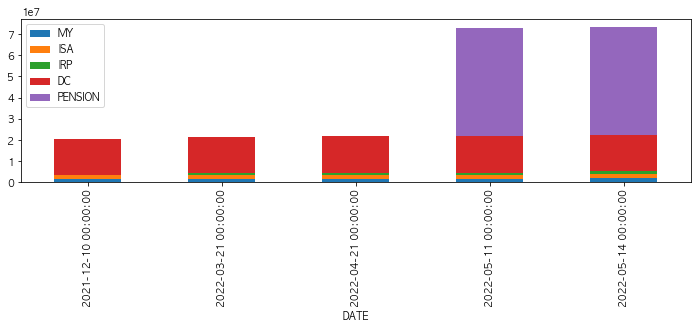

In [6]:
capital[list(account.values())].plot(kind='bar', stacked=True, figsize=(12, 3))

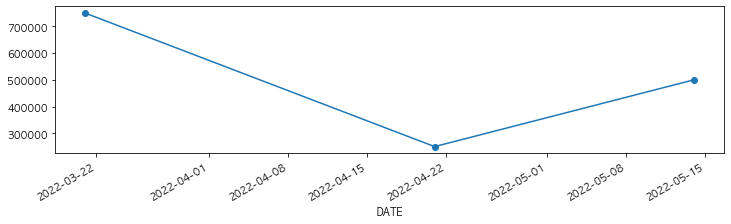

In [7]:
# 100만원 이하 자산변화에 대한 라인 그래프 생성
capital.DELTA[capital.DELTA < 1000000].plot(kind='line', marker='o', figsize= (12, 3))

In [8]:
# 입력된 값으로 1) df 생성, 2) capital 내 CAP열 값과 Join, 3) front fill로 없는 행 생성, 4) 불필요 행 삭제
eva = define_cap(list_eva, 'EVA').join(capital.CAP, how= 'outer', sort= True)
eva.CAP = eva.CAP.fillna(method= 'ffill')
eva.dropna(inplace= True)
eva = eva.astype('int')

eva['PROFIT'] = eva.EVA - eva.CAP
eva['PROFIT%'] = eva.PROFIT / eva.CAP * 100

eva.style.format("{:,.0f}")

,MY,ISA,IRP,DC,PENSION,EVA,CAP,PROFIT,PROFIT%
DATE,,,,,,,,,
2021-12-10 00:00:00,"1,500,000","2,000,000",0,"17,100,000",0,"20,600,000","20,600,000",0,0
2022-04-01 00:00:00,"1,320,963","1,815,919","745,075","17,169,766",0,"21,051,723","21,350,000","-298,277",-1
2022-04-08 00:00:00,"1,328,128","1,824,105","739,964","17,110,423",0,"21,002,620","21,350,000","-347,380",-2
2022-04-20 00:00:00,"1,306,232","1,843,025","734,283","17,122,584",0,"21,006,124","21,350,000","-343,876",-2
2022-04-26 00:00:00,"1,300,044","1,825,530","974,443","16,710,626",0,"20,810,643","21,600,000","-789,357",-4
2022-05-04 00:00:00,"1,297,685","1,810,670","973,821","16,818,596",0,"20,900,772","21,600,000","-699,228",-3
2022-05-11 00:00:00,"1,280,706","1,787,935","963,967","16,557,094","51,411,787","72,001,489","73,011,787","-1,010,298",-1
2022-05-18 00:00:00,"1,747,918","1,792,125","963,923","16,606,513","51,411,787","72,522,266","73,511,787","-989,521",-1


In [9]:
print("Latest Position")
print("------------------------------")
print("Capital        ₩", f'{eva.CAP[-1]:,}')
print("Evaluation     ₩", f'{eva.EVA[-1]:,}')
print("Profit         ₩", f'{eva.PROFIT[-1]:,}')
print("Profit%        {:.1f} %".format(eva['PROFIT%'][-1]))

Latest Position
------------------------------
Capital        ₩ 73,511,787
Evaluation     ₩ 72,522,266
Profit         ₩ -989,521
Profit%        -1.3 %


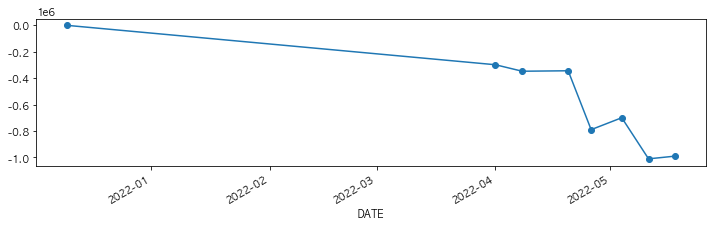

In [10]:
eva.PROFIT.plot(marker='o', figsize=(12, 3))

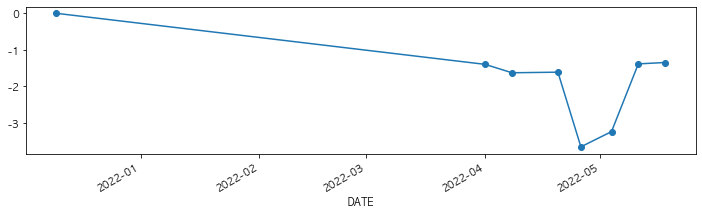

In [11]:
eva['PROFIT%'].plot(marker='o', figsize=(12, 3))

In [12]:
# 주요 벤치마크 지표와 Performance 비교

bmticker = {'S&P500': '^GSPC', 'Nasdaq': '^IXIC', 'KOSPI':'^KS11'}
bmdf = pd.DataFrame()

for tk in bmticker:
    tk_yahoo = yf.Ticker(bmticker[tk])
    data = tk_yahoo.history(start= eva.index[0])['Close']
    bmdf[tk] = data
    
bmdf = bmdf.dropna().astype('int32')

evabm = eva[['EVA', 'CAP', 'PROFIT', 'PROFIT%']].join(bmdf, how= 'inner', sort= True)

evabm['BM_SP500'] = evabm['S&P500'] / evabm['S&P500'][0] * 100 - 100
evabm['BM_Nasdaq'] = evabm['Nasdaq'] / evabm['Nasdaq'][0] * 100 - 100
evabm['BM_KOSPI'] = evabm['KOSPI'] / evabm['KOSPI'][0] * 100 - 100

evabm['MY_BM'] = evabm['PROFIT%'] - evabm['PROFIT%'][0]

evabm.style.format("{:,.0f}")

,EVA,CAP,PROFIT,PROFIT%,S&P500,Nasdaq,KOSPI,BM_SP500,BM_Nasdaq,BM_KOSPI,MY_BM
2021-12-10 00:00:00,"20,600,000","20,600,000",0,0,"4,712","15,630","3,010",0,0,0,0
2022-04-01 00:00:00,"21,051,723","21,350,000","-298,277",-1,"4,545","14,261","2,739",-4,-9,-9,-1
2022-04-08 00:00:00,"21,002,620","21,350,000","-347,380",-2,"4,488","13,711","2,700",-5,-12,-10,-2
2022-04-20 00:00:00,"21,006,124","21,350,000","-343,876",-2,"4,459","13,453","2,718",-5,-14,-10,-2
2022-04-26 00:00:00,"20,810,643","21,600,000","-789,357",-4,"4,175","12,490","2,668",-11,-20,-11,-4
2022-05-04 00:00:00,"20,900,772","21,600,000","-699,228",-3,"4,300","12,964","2,677",-9,-17,-11,-3
2022-05-11 00:00:00,"72,001,489","73,011,787","-1,010,298",-1,"3,935","11,364","2,592",-16,-27,-14,-1
2022-05-18 00:00:00,"72,522,266","73,511,787","-989,521",-1,"3,923","11,418","2,625",-17,-27,-13,-1


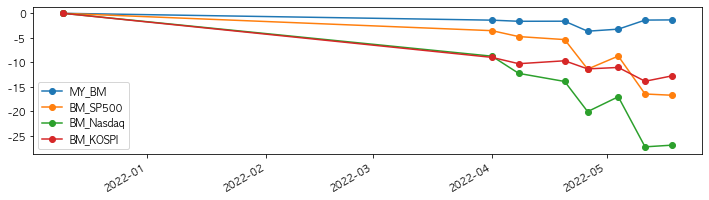

In [13]:
evabm[['MY_BM', 'BM_SP500', 'BM_Nasdaq', 'BM_KOSPI']].plot(marker='o', figsize=(12, 3))

## Position

In [14]:
position = pd.DataFrame(actions, columns=['DATE', 'TICKER', 'STOCKS', 'PRICE', 'ACCOUNT'])
# position.set_index('TICKER', inplace= True)

# 총 거래 가격. 현금 유출/유입으로 계산하므로 -1로 부호 반전
position['CAP'] = -1 * position.STOCKS * position.PRICE
# 매도 여부를 Boolean 형태로 별도 열 생성
position['SELL'] = position.STOCKS.apply(lambda x: True if x < 0 else False)

position.tail()

,DATE,TICKER,STOCKS,PRICE,ACCOUNT,CAP,SELL
57,2022-04-21,329200,154,6495,28,-1000230,False
58,2022-04-29,570049,42,11865,14,-498330,False
59,2022-05-12,394350,-82,9360,28,767520,True
60,2022-05-12,371450,-101,7830,28,790830,True
61,2022-05-17,409810,80,12580,01,-1006400,False


In [15]:
# 전체 거래횟수
print('Total Transaction:', len(position))
print('    Buy  ', len(position) - position.SELL.sum())
print('    Sell ', position.SELL.sum())
print('-----------------------')

# 거래회전량 계산 - 매도기준
total_action_cap = position.loc[position.SELL == True, 'CAP'].sum()
rotation_rate = total_action_cap / eva.CAP[-1] * 100
rotation_days = (pd.Timestamp(position.DATE.iloc[-1]) - capital.index[0]).days
rotation_per_year = rotation_rate / rotation_days * 365

print("Total Sell Amount    ₩", f'{total_action_cap:,}')
print(" ")
print("Sell Rotation : Target < 50%/year")
print("    {:.1f} %".format(rotation_rate), "over", rotation_days, "days")
print("    {:.1f} %".format(rotation_per_year), "/ year")

Total Transaction: 62
    Buy   43
    Sell  19
-----------------------
Total Sell Amount    ₩ 5,948,122
 
Sell Rotation : Target < 50%/year
    8.1 % over 158 days
    18.7 % / year


In [16]:
# open - 보유 중인 계약, closed - 종료된 거래을 담기 위한 각각의 df 생성
open = pd.DataFrame(columns=['TICKER', 'STOCKS', 'INVEST', 'AVG_PRICE'])
closed = pd.DataFrame(columns=['TICKER', 'DATE', 'BUY', 'SELL', 'DELTA', 'PROFIT%', 'STOCKS', 'CAP_CHANGE'])

# postion df를 loop하면서 SELL여부를 기준으로 open/closed df에 이력 추가 및 계산
for i, row in position.iterrows():
  # 매도일 경우, 1) closed df에 이력 추가. 2) open df에서는 주식수만 삭감하며 투자금액은 기존 평균가로 재산출
  if row['SELL'] == True:
    # print(i, 'SELL', row['TICKER'], row['TICKER'], row['DATE'], row['PRICE'],row['STOCKS'])
    buy = -1 * int(open.loc[open.TICKER == row['TICKER'], 'AVG_PRICE'])
    delta =  row['PRICE'] - buy
    profitper = delta / buy * 100
    capchange = -1 * delta * row['STOCKS']
    closed.loc[len(closed)] = [row['TICKER'], row['DATE'], buy, row['PRICE'], delta, profitper, row['STOCKS'], capchange]
    # print(closed)
    open.loc[i] = [row['TICKER'], row['STOCKS'], row['CAP'], 0]
    open = open.groupby(['TICKER']).sum().reset_index()
    open = open[open.STOCKS != 0]
    open.INVEST = open.STOCKS * open.AVG_PRICE

  # 매수일 경우, 주식수/거래대금을 기재 후 종목으로 합산 후 평균가 재산출
  else:
    # print(i, 'BUY', row['TICKER'], row['STOCKS'], row['CAP'])
    open.loc[i] = [row['TICKER'], row['STOCKS'], row['CAP'], np.nan]
    open = open.groupby(['TICKER']).sum().reset_index()
    # open = open[open.STOCKS != 0]
    open['AVG_PRICE'] = open.INVEST / open.STOCKS
    # print(open)
    # print("***********")
    # print(" ")

# 용이성을 위해 종목명을 병기하고 열 순서 변경
tcknaming(closed)
closed = closed[['DATE', 'TICKER', 'NAME', 'BUY', 'SELL', 'DELTA', 'PROFIT%', 'STOCKS', 'CAP_CHANGE']]
tcknaming(open)
open = open[['TICKER', 'NAME', 'STOCKS', 'AVG_PRICE', 'INVEST']]

## Closed Position

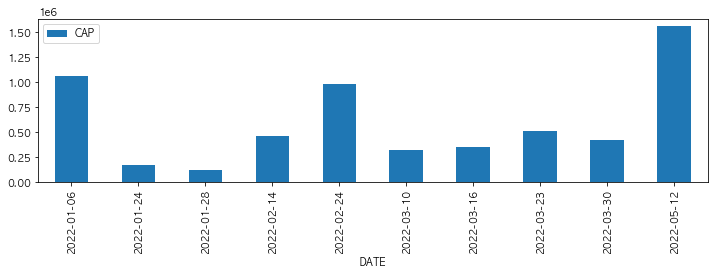

In [17]:
sell = position.loc[position.SELL == True].copy()
# tcknaming(sell)
# sell = sell[['DATE', 'TICKER', 'NAME', 'CAP', 'ACCOUNT']]

sellcap = sell[['DATE', 'CAP']].groupby(['DATE']).sum()
# sellcap.index = pd.to_datetime(sellcap.index)
sellcap.plot(kind= 'bar', figsize= (12, 3))

In [18]:
closed.style.format({"PROFIT%": "{:,.1f}", "CAP_CHANGE": "{:,.0f}"})

,DATE,TICKER,NAME,BUY,SELL,DELTA,PROFIT%,STOCKS,CAP_CHANGE
0,2022-01-06,005930,삼성전자,79042,77500,-1542,-2.0,-7,"-10,794"
1,2022-01-06,035420,NAVER,378000,346000,-32000,-8.5,-1,"-32,000"
2,2022-01-06,069500,KODEX 200,40027,39435,-592,-1.5,-2,"-1,184"
3,2022-01-06,088980,맥쿼리인프라,14150,13800,-350,-2.5,-7,"-2,450"
4,2022-01-24,411420,KODEX 미국메타버스나스닥액티브,10150,8475,-1675,-16.5,-20,"-33,500"
5,2022-01-28,000660,SK하이닉스,128500,119500,-9000,-7.0,-1,"-9,000"
6,2022-02-14,133690,TIGER 미국나스닥100,85717,76300,-9417,-11.0,-6,"-56,502"
7,2022-02-24,510006,대신 인버스 니켈선물 ETN(H),3820,3360,-460,-12.0,-53,"-24,380"
8,2022-02-24,360750,TIGER 미국S&P500,14141,12535,-1606,-11.4,-15,"-24,090"
9,2022-02-24,133690,TIGER 미국나스닥100,85717,70930,-14787,-17.3,-5,"-73,935"


In [19]:
print('Total Closed Capital    ₩', f'{sell.CAP.sum():,}')
print('Total Closed Profit     ₩' ,f'{closed.CAP_CHANGE.sum():,}')
print('--------------------------')
print('Total Closed Profit     {:.1f} %'.format(closed.CAP_CHANGE.sum() / sell.CAP.sum() * 100))

Total Closed Capital    ₩ 5,948,122
Total Closed Profit     ₩ -665,438
--------------------------
Total Closed Profit     -11.2 %


In [20]:
closed[['DATE', 'NAME', 'PROFIT%', 'CAP_CHANGE']].sort_values('CAP_CHANGE', ascending= False).style.format({"PROFIT%": "{:,.1f}", "CAP_CHANGE": "{:,.0f}"})

,DATE,NAME,PROFIT%,CAP_CHANGE
11,2022-03-10,KBSTAR 팔라듐선물(H),38.4,"88,255"
2,2022-01-06,KODEX 200,-1.5,"-1,184"
14,2022-03-23,TIGER 인버스,-2.6,"-2,375"
3,2022-01-06,맥쿼리인프라,-2.5,"-2,450"
15,2022-03-23,KODEX WTI원유선물인버스(H),-0.9,"-3,666"
5,2022-01-28,SK하이닉스,-7.0,"-9,000"
0,2022-01-06,삼성전자,-2.0,"-10,794"
13,2022-03-16,ARIRANG 신흥국MSCI(합성 H),-10.7,"-12,980"
8,2022-02-24,TIGER 미국S&P500,-11.4,"-24,090"
7,2022-02-24,대신 인버스 니켈선물 ETN(H),-12.0,"-24,380"


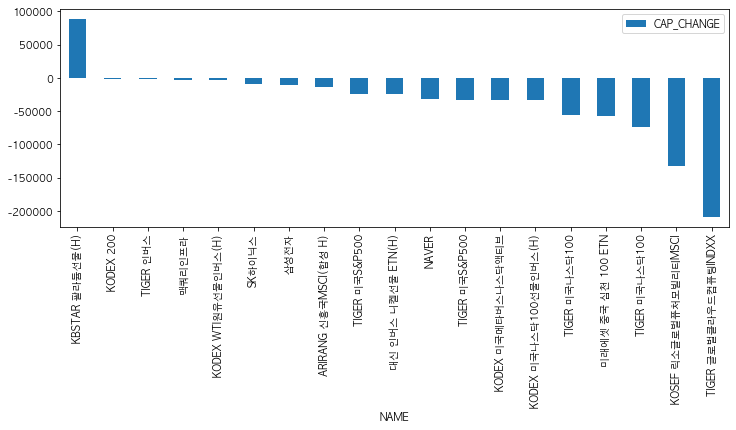

In [21]:
closed[['NAME', 'CAP_CHANGE']].set_index('NAME').sort_values('CAP_CHANGE', ascending= False).plot(kind= 'bar', figsize= (12, 4))

In [22]:
closed[['DATE', 'NAME', 'PROFIT%', 'CAP_CHANGE']].sort_values('PROFIT%', ascending= False).style.format({"PROFIT%": "{:,.1f}", "CAP_CHANGE": "{:,.0f}"})

,DATE,NAME,PROFIT%,CAP_CHANGE
11,2022-03-10,KBSTAR 팔라듐선물(H),38.4,"88,255"
15,2022-03-23,KODEX WTI원유선물인버스(H),-0.9,"-3,666"
2,2022-01-06,KODEX 200,-1.5,"-1,184"
0,2022-01-06,삼성전자,-2.0,"-10,794"
3,2022-01-06,맥쿼리인프라,-2.5,"-2,450"
14,2022-03-23,TIGER 인버스,-2.6,"-2,375"
5,2022-01-28,SK하이닉스,-7.0,"-9,000"
16,2022-03-30,KODEX 미국나스닥100선물인버스(H),-7.5,"-33,600"
1,2022-01-06,NAVER,-8.5,"-32,000"
13,2022-03-16,ARIRANG 신흥국MSCI(합성 H),-10.7,"-12,980"


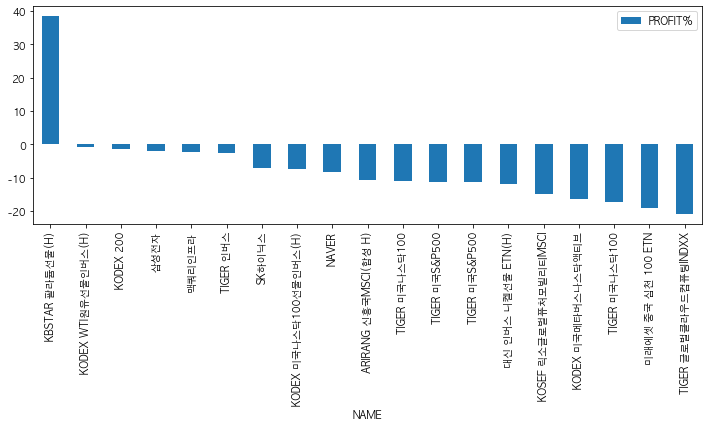

In [23]:
closed[['NAME', 'PROFIT%']].set_index('NAME').sort_values('PROFIT%', ascending= False).plot(kind= 'bar', figsize= (12, 4))

## Open Position

In [ ]:
market = open.copy()
market[['AVG_PRICE', 'INVEST']] = market[['AVG_PRICE', 'INVEST']].astype('int')

marketprice = []

for tk in market.TICKER.to_list():
    tk_yahoo = yf.Ticker(tk + '.KS')
    data = tk_yahoo.history().tail(1)['Close'].iloc[0]
    marketprice.append(data)

# CV: 현재평가액 = 현재가 x 보유수, EVA: 평가증감 = 포지션 - 현재평가액
market['MARKET_PRICE'] = marketprice
market['CV'] = market.MARKET_PRICE * market.STOCKS
market['PROFIT'] = market.CV + market.INVEST
market['PROFIT%'] = market.PROFIT / market.INVEST * -100

print('Total Open Profit :  ₩' ,f'{market.PROFIT.sum():,}')

In [ ]:
colformat = {"PROFIT%": "{:,.1f}", 
             "AVG_PRICE": "{:,.0f}", "INVEST": "{:,.0f}", "MARKET_PRICE": "{:,.0f}", 
             "CV": "{:,.0f}", "PROFIT": "{:,.0f}"}
market.style.format(colformat)

# 투자원금이 큰 순서대로 배열
market.sort_values(by=['INVEST'], ascending= True, ignore_index=False)

In [ ]:
# 투자수익이 큰 순서대로 배열
market.sort_values(by=['PROFIT'], ascending= False, ignore_index=False)

In [ ]:
market[['NAME', 'PROFIT']].set_index('NAME').sort_values('PROFIT', ascending= False).plot(kind= 'bar', figsize= (12, 4))

In [ ]:
market[['NAME', 'PROFIT%']].set_index('NAME').sort_values('PROFIT%', ascending= False).plot(kind= 'bar', figsize= (12, 4))

In [ ]:
print('Current Portfolio Total')
print('-----------------------------')
print('Values    ₩', f'{int(market.CV.sum()):,}')
print('Profit    ₩  ', f'{int(market.PROFIT.sum()):,}')
print('Profit%   {:.2f} %'.format(market.PROFIT.sum() / market.INVEST.sum() * -100))